n

n

n

### 0. Preprocesamiento de datos

Importar Bibliotecas

In [1]:
# Ignorar warnings ------------------------------------------------------------------------------------------

import warnings
warnings.filterwarnings("ignore")

# Lectura y manipulación de datos ---------------------------------------------------------------------------

import pandas as pd
import numpy as np

# Visualización de datos ------------------------------------------------------------------------------------

import matplotlib.pyplot as plt

In [2]:
# Leer la base de datos, se agrega el encoding por el texto
raw_data = pd.read_csv('enmt_unam.csv', encoding='latin-1')
raw_data.head()

,con1,D_R,edo,muni,loca,folio,ageb,hr_ini1,min_ini1,hr_ter1,...,Pondi2,Pondi_v,Pondi_h,sexo,edad_1,cond_act,ing_ind,ing_fam,escol,total2
0,1,,28,41,1,5,098-6,9,34,10,...,11032,5469,5490,2,3,2,0,3,2,1
1,2,,26,18,1,1,203-A,13,40,14,...,63083,11709,11705,2,5,2,0,8,4,1
2,3,,15,37,18,4,044-A,12,8,13,...,31357,13213,13220,1,4,1,3,3,4,1
3,4,,15,109,3,5,078-A,11,33,12,...,61769,9125,8828,2,2,1,0,0,5,1
4,5,,12,67,16,4,999-9,10,40,11,...,99437,65655,65456,2,6,1,2,3,2,1


Seleccionamos las columnas de la variables que nos interesan para responder las preguntas seleccionadas

In [3]:
data = raw_data[['Tam_loc','h10_2','h11_1','h14_2n','ing_fam','p16','p17_1','p17_4','h21_1']]
data.head()

,Tam_loc,h10_2,h11_1,h14_2n,ing_fam,p16,p17_1,p17_4,h21_1
0,1,2,55,3,3,98,1,1,9
1,1,2,49,7,8,4,1,2,12
2,3,2,44,7,3,4,1,1,1
3,1,1,60,3,0,2,1,2,7
4,4,2,60,3,3,6,1,2,7


Renombramos el nombre de las columnas para entender que variables son.

In [4]:
data = data.rename(columns={'Tam_loc':'Residencia','h10_2':'Sexo', 'h11_1': 'Edad','h14_2n':'Educacion',
                            'p16':'Transporte','p17_1':'Eficiencia','p17_4':'Seguridad','h21_1':'Ocupación'})
data.head()

,Residencia,Sexo,Edad,Educacion,ing_fam,Transporte,Eficiencia,Seguridad,Ocupación
0,1,2,55,3,3,98,1,1,9
1,1,2,49,7,8,4,1,2,12
2,3,2,44,7,3,4,1,1,1
3,1,1,60,3,0,2,1,2,7
4,4,2,60,3,3,6,1,2,7


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1191 entries, 0 to 1190
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Residencia  1191 non-null   int64
 1   Sexo        1191 non-null   int64
 2   Edad        1191 non-null   int64
 3   Educacion   1191 non-null   int64
 4   ing_fam     1191 non-null   int64
 5   Transporte  1191 non-null   int64
 6   Eficiencia  1191 non-null   int64
 7   Seguridad   1191 non-null   int64
 8   Ocupación   1191 non-null   int64
dtypes: int64(9)
memory usage: 83.9 KB


Columna 1: Tam_loc

In [6]:
data['Residencia'].unique()

array([1, 3, 4, 2])

In [8]:
info_Tam_loc = {1: 'grande', 2: 'grande', 3: 'pequeño', 4: 'pequeño'}

info_Tam_loc.get(1)

Tam_loc_renamed = [info_Tam_loc.get(x) for x in data['Residencia'].values]

data['Residencia'] = Tam_loc_renamed

data['Residencia']

0        grande
1        grande
2       pequeño
3        grande
4       pequeño
         ...   
1186     grande
1187     grande
1188     grande
1189    pequeño
1190     grande
Name: Residencia, Length: 1191, dtype: object

Columna 2: Sexo

In [9]:
info_Sexo = {1: 'hombre', 2: 'mujer'}

info_Sexo_renamed = [info_Sexo.get(x) for x in data['Sexo'].values]

data['Sexo'] = info_Sexo_renamed

data['Sexo']

0        mujer
1        mujer
2        mujer
3       hombre
4        mujer
         ...  
1186     mujer
1187     mujer
1188     mujer
1189     mujer
1190     mujer
Name: Sexo, Length: 1191, dtype: object

Columna 3: Edad

In [10]:
data['Edad'].unique()

array([55, 49, 44, 60, 29, 65, 56, 64, 38, 70, 51, 61, 27, 39, 40, 37, 30,
       31, 45, 62, 50, 36, 25, 42, 48, 32, 21, 53, 57, 80, 22, 46, 23, 43,
       26, 28, 63, 41, 67, 24, 35, 68, 54, 77, 58, 52, 78, 75, 34, 47, 59,
       33, 74, 66, 72, 73, 69, 18, 71, 76, 84, 20, 90, 79, 83, 87, 89, 82,
       81,  0, 19,  3, 97, 85])

In [11]:
#info_Edad = {1: 'hombre', 2: 'mujer'}

info_Edad_renamed = []

for x in data['Edad'].values:
    if x < 18:
        info_Edad_renamed.append('joven')
        
    elif x > 18 and x < 35:
        info_Edad_renamed.append('adulto_joven')
        
    else:
        info_Edad_renamed.append('adulto_mayor')

data['Edad'] = info_Edad_renamed

data['Edad']

0       adulto_mayor
1       adulto_mayor
2       adulto_mayor
3       adulto_mayor
4       adulto_mayor
            ...     
1186    adulto_mayor
1187    adulto_joven
1188    adulto_mayor
1189    adulto_mayor
1190    adulto_mayor
Name: Edad, Length: 1191, dtype: object

In [12]:
data

,Residencia,Sexo,Edad,Educacion,ing_fam,Transporte,Eficiencia,Seguridad,Ocupación
0,grande,mujer,adulto_mayor,3,3,98,1,1,9
1,grande,mujer,adulto_mayor,7,8,4,1,2,12
2,pequeño,mujer,adulto_mayor,7,3,4,1,1,1
3,grande,hombre,adulto_mayor,3,0,2,1,2,7
4,pequeño,mujer,adulto_mayor,3,3,6,1,2,7
...,...,...,...,...,...,...,...,...,...
1186,grande,mujer,adulto_mayor,4,7,98,2,2,14
1187,grande,mujer,adulto_joven,7,8,9,2,2,6
1188,grande,mujer,adulto_mayor,4,8,4,2,2,2
1189,pequeño,mujer,adulto_mayor,3,5,9,2,1,5


Columna 4: Educación

In [13]:
#Se observan los valores únicos de educación
data.Educacion.unique()

array([ 3,  7,  6, -1,  4,  8,  9,  1, 99,  5,  2, 10, 11, 98])

In [14]:
#Se reemplazan los valores -1, 98, 99 por la moda de la columna, ya que estos son tomados como valores faltantes.
moda = data['Educacion'].mode()
valores_inadecuados = [-1, 98, 99]

for i, value in enumerate(data.Educacion):
    if value in valores_inadecuados:
        data.Educacion[i] = moda

In [15]:
#Se obtienen las frecuencias de los valores únicos para así tener una idea de como reducir la cardinalidad de la variable.
frecuencias = data['Educacion'].value_counts()

print(frecuencias)

4     482
3     243
6     185
5      71
9      70
7      60
1      45
2      12
8       9
10      8
11      6
Name: Educacion, dtype: int64


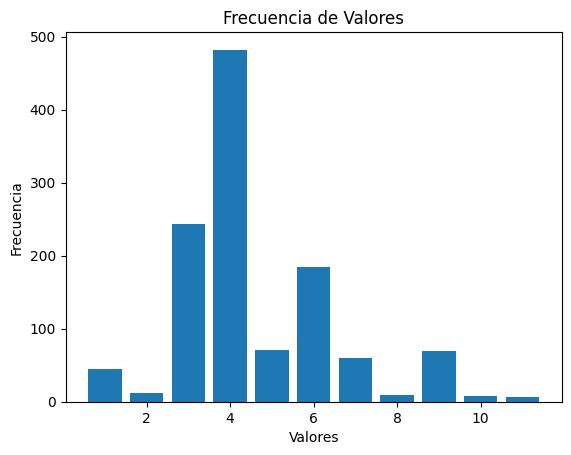

In [16]:
# Se puede visualizar de forma más clara con un gráfico de barras
plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Valores')
plt.show()

In [17]:
# Se agrupan los valores que representen un nivel de estudios de secundaria técnica con secundaria, los de preparatoria técnica
# y normal con preparatoria, y maestría o doctorado y carrera secretarial con primaria junto con profesional
valores_raros1 = [10, 11]
valores_raros2 = [7, 8]

for i, value in enumerate(data.Educacion):
    if value in valores_raros1:
        data.Educacion[i] = 9
    elif value in valores_raros2:
        data.Educacion[i] = 6
    elif value == 5:
        data.Educacion[i] = 4

In [18]:
#Se renombram los seis niveles de educación
info_Educacion = {1:'ninguno', 2:'preescolar', 3:'primaria', 4:'secundaria', 6:'preparatoria', 9:'profesional'}
n_Educacion = [info_Educacion.get(x) for x in data['Educacion'].values]
data['Educacion'] = n_Educacion

Columna 5: Ingreso Familiar

In [19]:
#Se revisan valores únicos de la columna de ingreso familiar
data.ing_fam.unique()

array([3, 8, 0, 6, 5, 4, 7, 2])

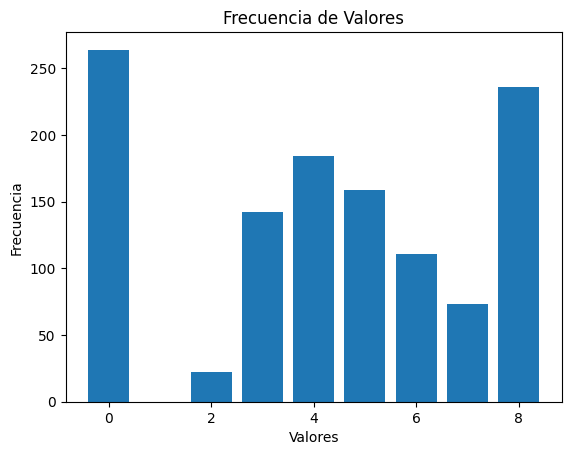

In [20]:
#Se obtienen las frecuencias y realizamos el gráfico de barras
#Debido a la distribución simétrica de los datos, el ingreso se divide en alto y bajo
frecuencias = data['ing_fam'].value_counts()

plt.bar(frecuencias.index, frecuencias.values)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Valores')
plt.show()

In [21]:
#Se renoombran los valores, siendo el 6142 pesos el valor que divide los bajos y altos ingresos
info_ing_fam = {0:'bajo ingreso', 2:'bajo ingreso', 3:'bajo ingreso', 4:'bajo ingreso', 5:'alto ingreso', 6:'alto ingreso', 
                  7:'alto ingreso', 8:'alto ingreso'}
n_ing_fam = [info_ing_fam.get(x) for x in data['ing_fam'].values]
data['ing_fam'] = n_ing_fam
data.head()

,Residencia,Sexo,Edad,Educacion,ing_fam,Transporte,Eficiencia,Seguridad,Ocupación
0,grande,mujer,adulto_mayor,primaria,bajo ingreso,98,1,1,9
1,grande,mujer,adulto_mayor,preparatoria,alto ingreso,4,1,2,12
2,pequeño,mujer,adulto_mayor,preparatoria,bajo ingreso,4,1,1,1
3,grande,hombre,adulto_mayor,primaria,bajo ingreso,2,1,2,7
4,pequeño,mujer,adulto_mayor,primaria,bajo ingreso,6,1,2,7


Columna 6: Transporte

In [22]:
#Utilizamos unique() para observar que transporte cuenta con 18 variables únicas
data.Transporte.unique()

array([98,  4,  2,  6,  9,  5, 13,  7, 99,  8, 12, 14, 18,  3, 23, 19,  1,
       15])

In [23]:
#Verificamos que la columna no tenga valores nulls
pd.isna(data['Transporte']).sum()

0

In [24]:
#Se reemplazan los valores 20, 23, 98, 99 por la moda de la columna, ya que estos son valores que no nos sirven.
moda3 = data['Transporte'].mode()
valores_inadecuados3 = [98, 99, 20, 23]

for i, value in enumerate(data.Transporte):
    if value in valores_inadecuados3:
        data.at[i, 'Transporte'] = moda3

In [25]:
#Verificamos que los valores se hayan reemplazados
data.Transporte.unique()

array([ 4,  2,  6,  9,  5, 13,  7,  8, 12, 14, 18,  3, 19,  1, 15])

In [26]:
#Utilizamos la función de value_counts() para contar cuantos valores tenemos de cada valor único para así reducir la cardinalidad de la variable
frecuence = data['Transporte'].value_counts()

print(frecuence)

4     367
9     217
5     206
6     187
2      82
14     44
13     31
7      17
12     15
8      13
3       4
1       3
18      2
19      2
15      1
Name: Transporte, dtype: int64


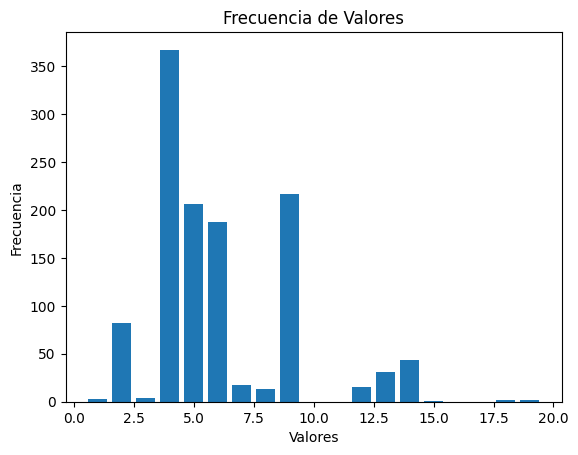

In [27]:
#Generamos un histograma para verlo de forma más visual
plt.bar(frecuence.index, frecuence.values)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Valores')
plt.show()

In [28]:
#Se genera un diccionario y se renombran los 18 diferentes medios de transporte que se encuentran en el dataset
info_Transporte = {1:'Tren', 2:'Tren urbano (Metro)', 3:'Transporte eléctrico', 4:'Automóvil', 5:'Camión', 6:'Colectivo (Combi)',
                  7:'Autobús foráneo', 8:'BRT', 9:'Taxi', 12:'Motocicleta', 13:'Mototaxi', 14:'Bicicleta',
                  15:'Patineta', 18:'Animal', 19:'Avión'}
n_Transporte = [info_Transporte.get(x) for x in data['Transporte'].values]
data['Transporte'] = n_Transporte
data.head()

,Residencia,Sexo,Edad,Educacion,ing_fam,Transporte,Eficiencia,Seguridad,Ocupación
0,grande,mujer,adulto_mayor,primaria,bajo ingreso,Automóvil,1,1,9
1,grande,mujer,adulto_mayor,preparatoria,alto ingreso,Automóvil,1,2,12
2,pequeño,mujer,adulto_mayor,preparatoria,bajo ingreso,Automóvil,1,1,1
3,grande,hombre,adulto_mayor,primaria,bajo ingreso,Tren urbano (Metro),1,2,7
4,pequeño,mujer,adulto_mayor,primaria,bajo ingreso,Colectivo (Combi),1,2,7


Columna 7: Eficiencia

In [29]:
#Se observa que en eficiencia solo se tienen dos valores únicos, siendo 1 igual a eficiente y 2 a ineficiente
data.Eficiencia.unique()

array([1, 2])

In [30]:
#Se renombran los valores
info_Eficiencia = {1:'eficiente', 2:'ineficiente'}
n_Eficiencia = [info_Eficiencia.get(x) for x in data['Eficiencia'].values]
data['Eficiencia'] = n_Eficiencia
data.head()

,Residencia,Sexo,Edad,Educacion,ing_fam,Transporte,Eficiencia,Seguridad,Ocupación
0,grande,mujer,adulto_mayor,primaria,bajo ingreso,Automóvil,eficiente,1,9
1,grande,mujer,adulto_mayor,preparatoria,alto ingreso,Automóvil,eficiente,2,12
2,pequeño,mujer,adulto_mayor,preparatoria,bajo ingreso,Automóvil,eficiente,1,1
3,grande,hombre,adulto_mayor,primaria,bajo ingreso,Tren urbano (Metro),eficiente,2,7
4,pequeño,mujer,adulto_mayor,primaria,bajo ingreso,Colectivo (Combi),eficiente,2,7


Columna 8: Seguridad

In [31]:
#Se observa que en seguridad solo se tienen dos valores únicos, siendo 1 igual a seguro y 2 a inseguro
data.Seguridad.unique()

array([1, 2])

In [32]:
#Se renombran los valores
info_Seguridad = {1:'seguro', 2:'inseguro'}
n_Seguridad = [info_Seguridad.get(x) for x in data['Seguridad'].values]
data['Seguridad'] = n_Seguridad
data.head()

,Residencia,Sexo,Edad,Educacion,ing_fam,Transporte,Eficiencia,Seguridad,Ocupación
0,grande,mujer,adulto_mayor,primaria,bajo ingreso,Automóvil,eficiente,seguro,9
1,grande,mujer,adulto_mayor,preparatoria,alto ingreso,Automóvil,eficiente,inseguro,12
2,pequeño,mujer,adulto_mayor,preparatoria,bajo ingreso,Automóvil,eficiente,seguro,1
3,grande,hombre,adulto_mayor,primaria,bajo ingreso,Tren urbano (Metro),eficiente,inseguro,7
4,pequeño,mujer,adulto_mayor,primaria,bajo ingreso,Colectivo (Combi),eficiente,inseguro,7


Columna 9: Ocupación

In [33]:
#Se observan los valores únicos de ocupación
data.Ocupación.unique()

array([ 9, 12,  1,  7, 13,  2, -1,  4,  5, 14, 11, 10,  3, 99,  6,  8, 97,
       98])

In [34]:
#Se reemplazan los valores -1, 97, 98, 99 por la moda de la columna, ya que estos son tomados como valores faltantes.
moda2 = data['Ocupación'].mode()
valores_inadecuados2 = [-1, 97, 98, 99]

for i, value in enumerate(data.Ocupación):
    if value in valores_inadecuados2:
        data.at[i, 'Ocupación'] = moda2

In [35]:
#Se obtienen las frecuencias de los valores únicos para así tener una idea de como reducir la cardinalidad de la variable.
frecuencias2 = data['Ocupación'].value_counts()

print(frecuencias2)

7     332
5     133
2     114
12     94
1      82
4      82
14     73
6      72
11     67
8      56
3      30
9      28
10     23
13      5
Name: Ocupación, dtype: int64


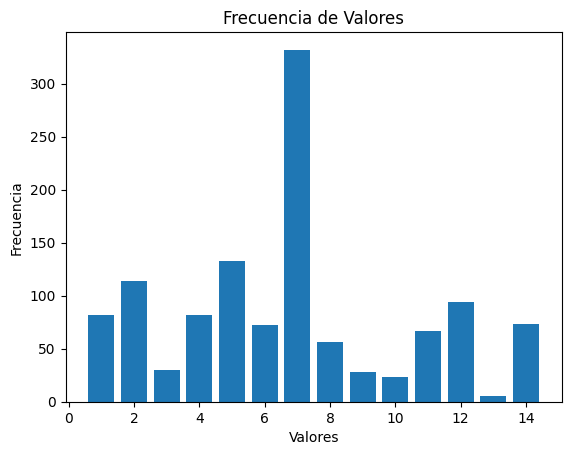

In [36]:
# Se puede visualizar de forma más clara con un gráfico de barras
plt.bar(frecuencias2.index, frecuencias2.values)
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Valores')
plt.show()

Se hace la agrupación y el renombramiento. Al final se tienen únicamente cuatro grupos

* Empleados: Profesionists, Educadores, Agricultor, Empleado y Trabajador industrial

* Jefes: Administrador, Trabajador por cuenta propia y Patrón

* Servicios: Técnico, Reparador, Servicios domésticos, Servicios

* Comerciantes: este apartado no se une a ningún subconjunto ya que es con gran diferencia la moda

* Vendedor ambulante: este apartado se deja por separado ya que una de las queries asignadas al equipo envuelve directamente a este apartado

In [37]:
empleados = [1, 3, 4, 8, 14]
jefes = [6, 12, 13]
servicios = [2, 5, 10, 11]


for i, value in enumerate(data.Ocupación):
    if value in empleados:
        data.Ocupación[i] = 'empleado'
    elif value in jefes:
        data.Ocupación[i] = 'jefe'
    elif value in servicios:
        data.Ocupación[i] = 'servidor'
    elif value == 7:
        data.Ocupación[i] = 'comerciante'
    elif value == 9:
        data.Ocupación[i] = 'vendedor_ambulante'
data.head()

,Residencia,Sexo,Edad,Educacion,ing_fam,Transporte,Eficiencia,Seguridad,Ocupación
0,grande,mujer,adulto_mayor,primaria,bajo ingreso,Automóvil,eficiente,seguro,vendedor_ambulante
1,grande,mujer,adulto_mayor,preparatoria,alto ingreso,Automóvil,eficiente,inseguro,jefe
2,pequeño,mujer,adulto_mayor,preparatoria,bajo ingreso,Automóvil,eficiente,seguro,empleado
3,grande,hombre,adulto_mayor,primaria,bajo ingreso,Tren urbano (Metro),eficiente,inseguro,comerciante
4,pequeño,mujer,adulto_mayor,primaria,bajo ingreso,Colectivo (Combi),eficiente,inseguro,comerciante


In [39]:
# Exportar la nueva base 
data.to_csv('clean_data_evidencia1.csv', index=False)